In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
telco_data=pd.read_csv('telcodata.csv')

## EDA 

In [56]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [58]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Text(0.5, 1.0, 'Churn Distribution')

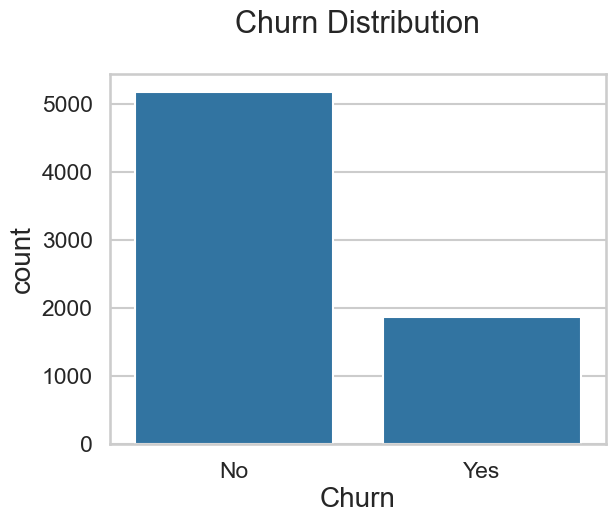

In [59]:
# Visualize the Target Variable Distribution
sns.countplot(x=telco_data['Churn'])
plt.title('Churn Distribution')

In [60]:
# Check for imbalance in target variable
counts=telco_data['Churn'].value_counts(normalize=True)*100
print(counts)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


Churn

-No     5174  = 73.5%   (Majority Class)    
-Yes    1869  = 26.5%   (Minority Class)

In [61]:
# Imbalance Ratio
majority = counts.max()
minority = counts.min()
imbalance_ratio = majority/minority
if imbalance_ratio>10:
   print("Severe imbalance")
elif imbalance_ratio > 3:
    print("High imbalance")
elif imbalance_ratio > 1.5:
    print("Mild imbalance")
else:
    print("Balanced dataset")

Mild imbalance


In [62]:
# Creating a dataframe to get the percentage of misssing values
missing_values = pd.DataFrame(telco_data.isnull().sum(), columns=['Missing Values'])
missing_values['Percentage'] = (missing_values['Missing Values'] / len(telco_data)) * 100
print(missing_values)

                  Missing Values  Percentage
customerID                     0         0.0
gender                         0         0.0
SeniorCitizen                  0         0.0
Partner                        0         0.0
Dependents                     0         0.0
tenure                         0         0.0
PhoneService                   0         0.0
MultipleLines                  0         0.0
InternetService                0         0.0
OnlineSecurity                 0         0.0
OnlineBackup                   0         0.0
DeviceProtection               0         0.0
TechSupport                    0         0.0
StreamingTV                    0         0.0
StreamingMovies                0         0.0
Contract                       0         0.0
PaperlessBilling               0         0.0
PaymentMethod                  0         0.0
MonthlyCharges                 0         0.0
TotalCharges                   0         0.0
Churn                          0         0.0


In [63]:
telco_data=telco_data.copy()

In [64]:
telco_data.TotalCharges=pd.to_numeric(telco_data.TotalCharges,errors='coerce')  # coerce errors to NaN
telco_data.isnull().sum()  # checking for null values after conversion


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [65]:
telco_data.loc[telco_data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [66]:
# Removing missing values
telco_data.dropna(how='any', inplace=True)  # drop any rows with missing values
telco_data.info()  # checking the info after removing missing values

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [67]:
# Group tenure into bins of 12 months
print(telco_data['tenure'].max())  # checking the max tenure

72


In [68]:
# Create bins (0 to 72 with step of 12)
bins = list(range(0, 73, 12))  # [0, 12, 24, 36, 48, 60, 72]

# Adjust the last bin to include the maximum tenure
bins[-1] = 73  

labels = [
    "0–12",
    "13–24",
    "25–36",
    "37–48",
    "49–60",
    "61–72"
]

telco_data["tenure_group"] = pd.cut(
    telco_data["tenure"],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

In [69]:
# New tenure_group column value counts
telco_data['tenure_group'].value_counts().sort_index()

tenure_group
0–12     2175
13–24    1024
25–36     832
37–48     762
49–60     832
61–72    1407
Name: count, dtype: int64

In [70]:
telco_data.info()
telco_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   object  
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   object  
 4   Dependents        7032 non-null   object  
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   object  
 7   MultipleLines     7032 non-null   object  
 8   InternetService   7032 non-null   object  
 9   OnlineSecurity    7032 non-null   object  
 10  OnlineBackup      7032 non-null   object  
 11  DeviceProtection  7032 non-null   object  
 12  TechSupport       7032 non-null   object  
 13  StreamingTV       7032 non-null   object  
 14  StreamingMovies   7032 non-null   object  
 15  Contract          7032 non-null   object  
 16  PaperlessBilling  7032 non-nu

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0–12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25–36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0–12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37–48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0–12


In [71]:
# Drop the original 'tenure' and 'customerID' columns
telco_data.drop(columns=['tenure','customerID'],axis=1,inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0–12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25–36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0–12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37–48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0–12


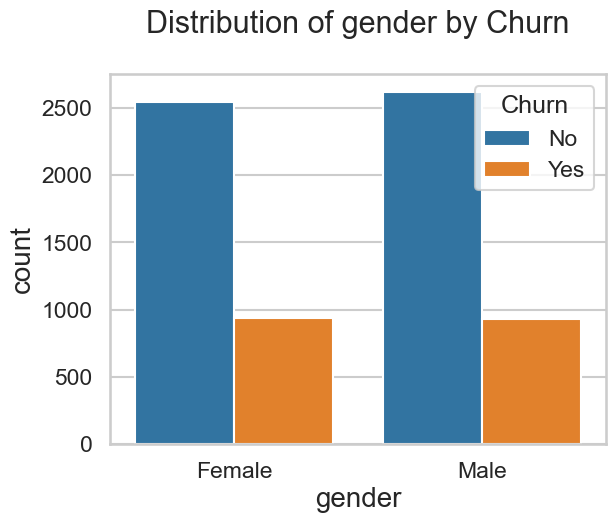

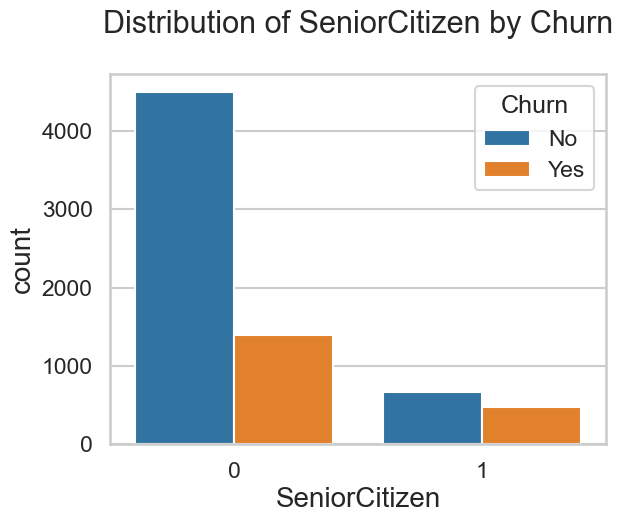

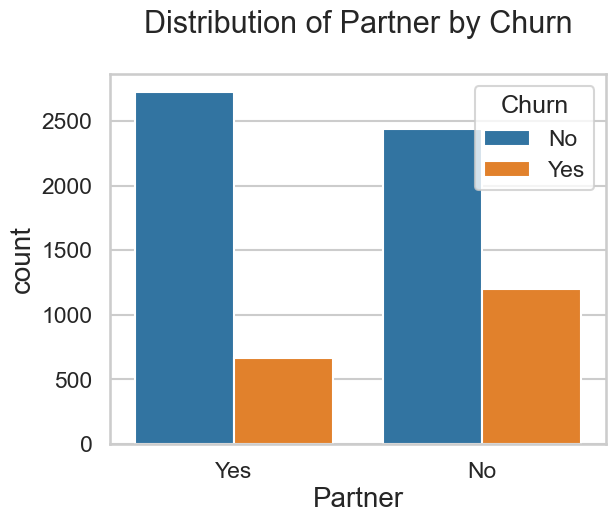

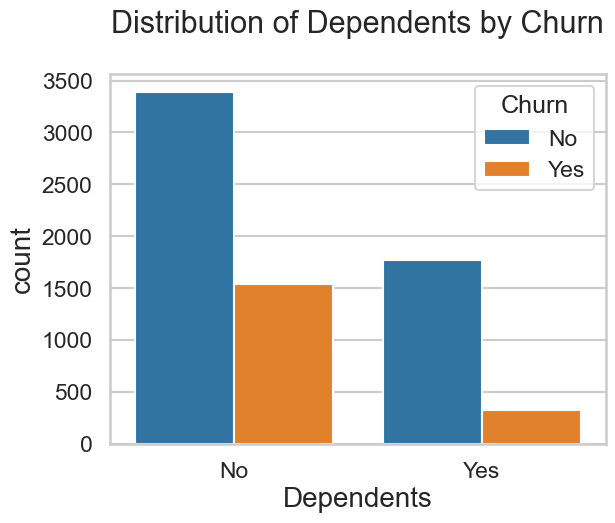

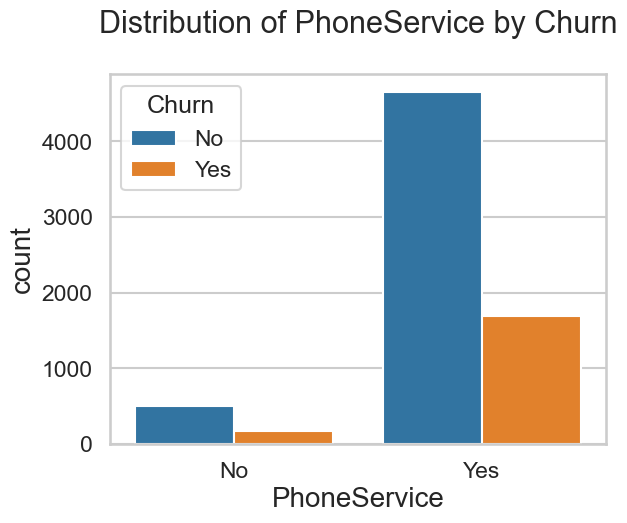

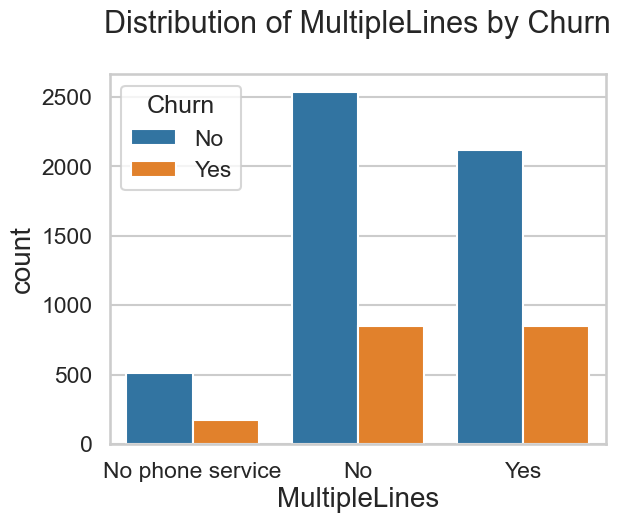

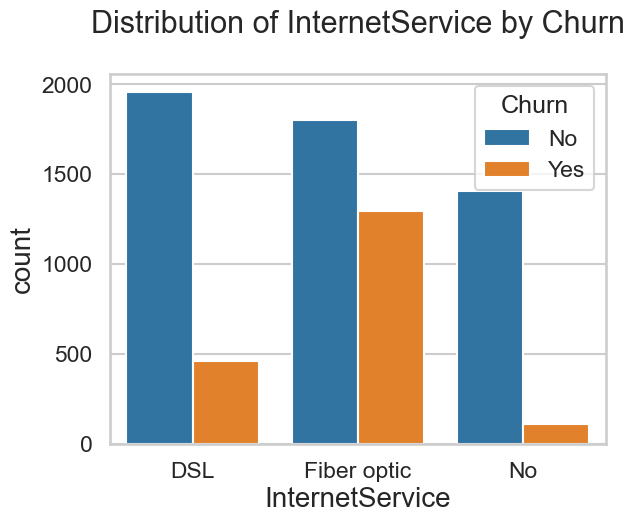

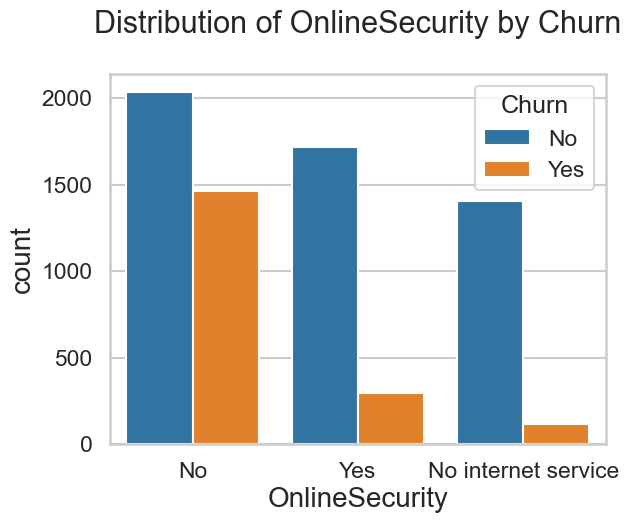

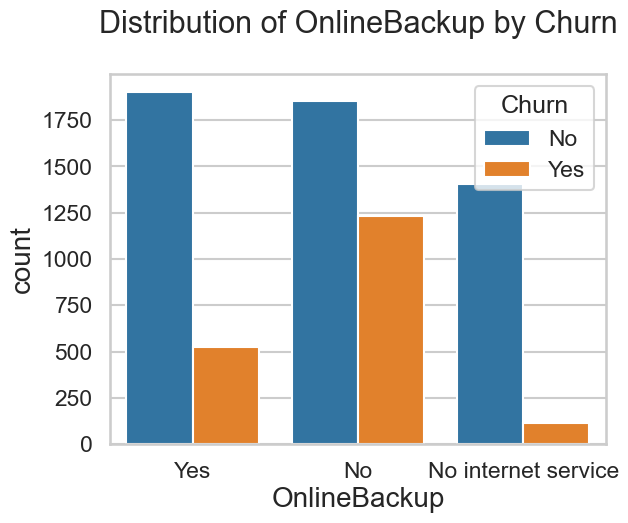

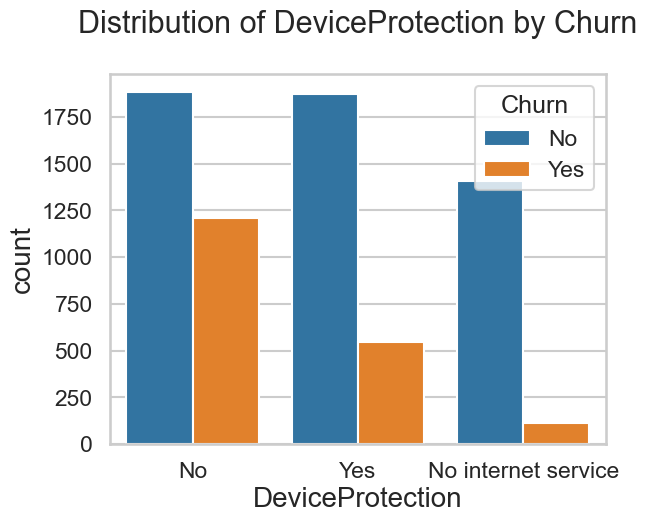

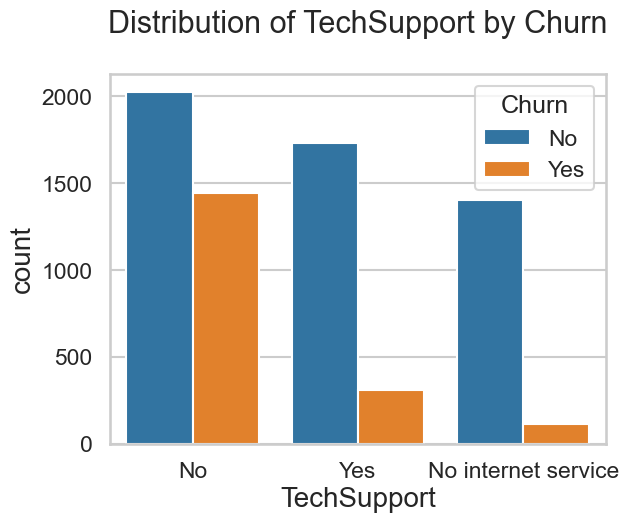

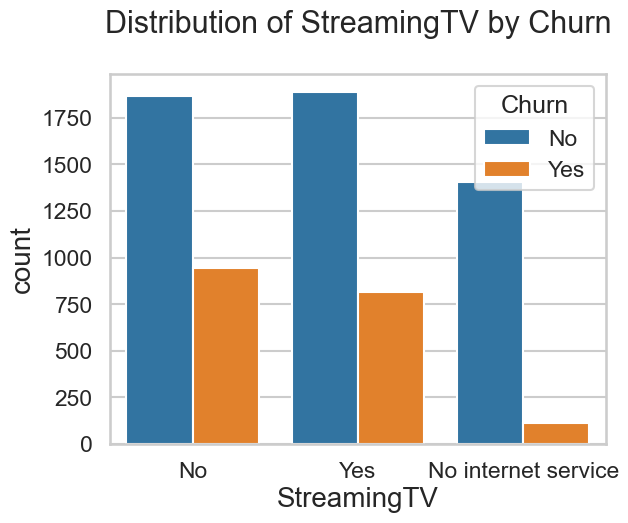

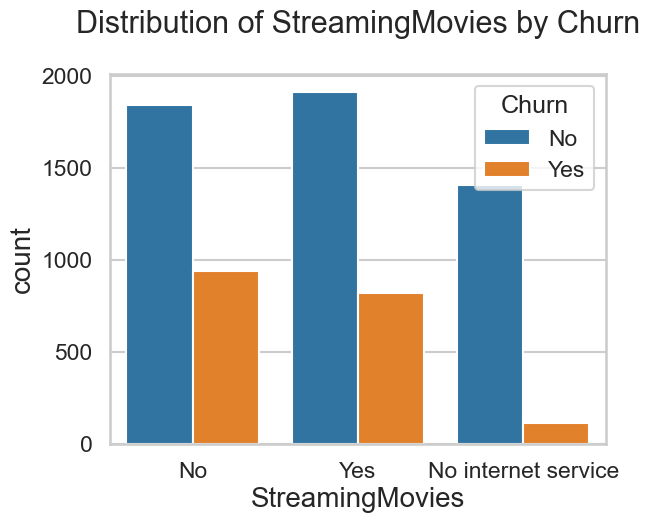

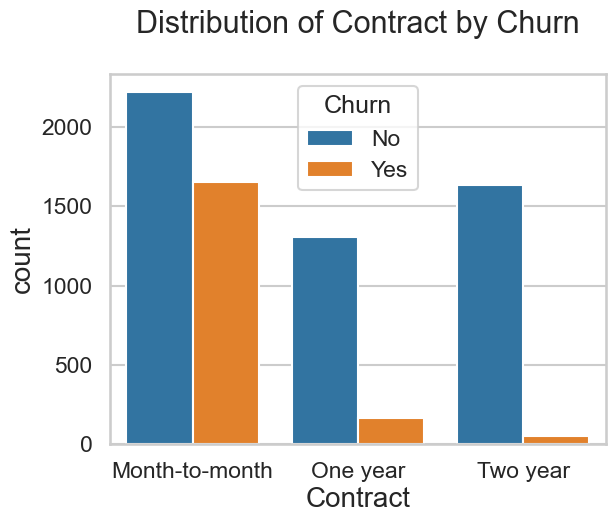

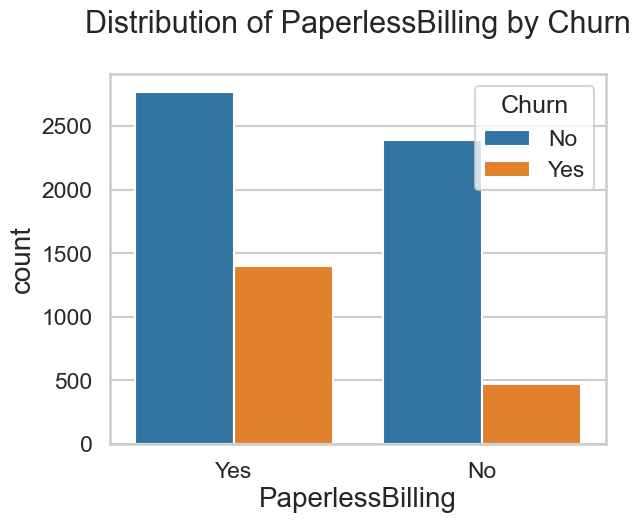

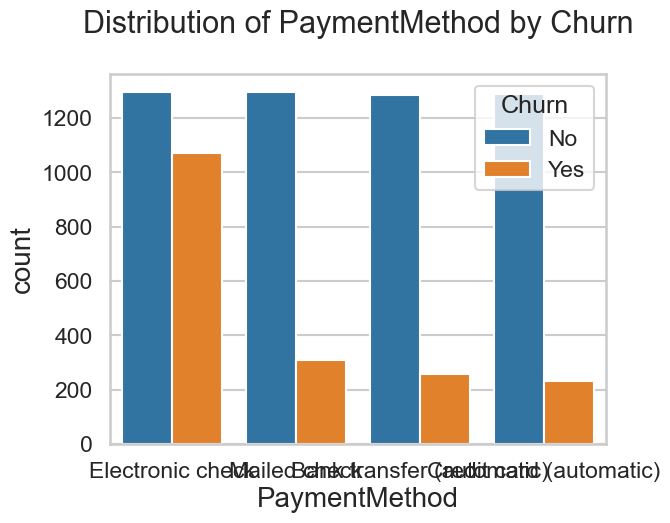

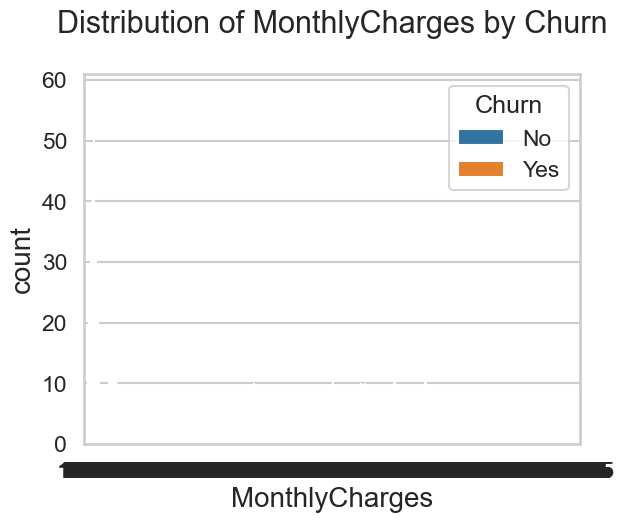

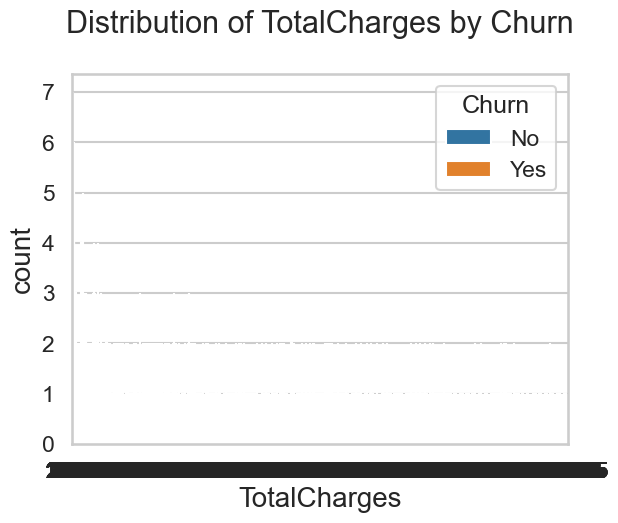

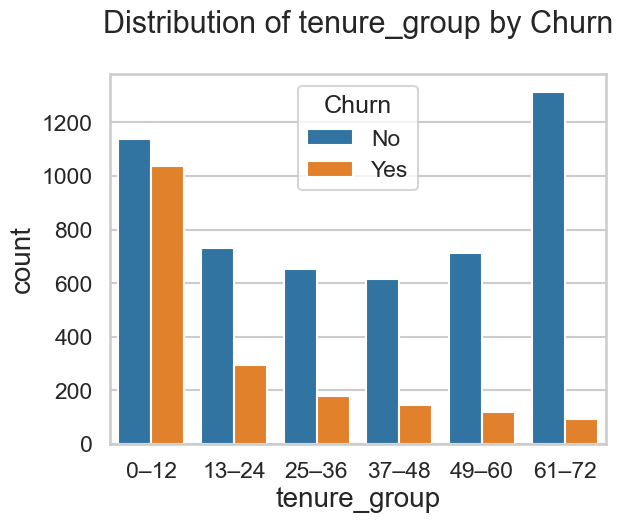

In [72]:
# Univariate Analysis
for i, predictor in enumerate(telco_data.columns.drop('Churn')):
    plt.figure(i)
    sns.countplot(x=telco_data[predictor], hue=telco_data['Churn'])
    plt.title(f'Distribution of {predictor} by Churn')
    plt.show()

In [73]:
telco_data['Churn']=np.where(telco_data['Churn']=='Yes',1,0)  # 1 for Yes and 0 for No
telco_data.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0–12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25–36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0–12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37–48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0–12


In [74]:
# Convert categorical variables to dummy  variables
telco_data_new = pd.get_dummies(telco_data)
telco_data_new.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_0–12,tenure_group_13–24,tenure_group_25–36,tenure_group_37–48,tenure_group_49–60,tenure_group_61–72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

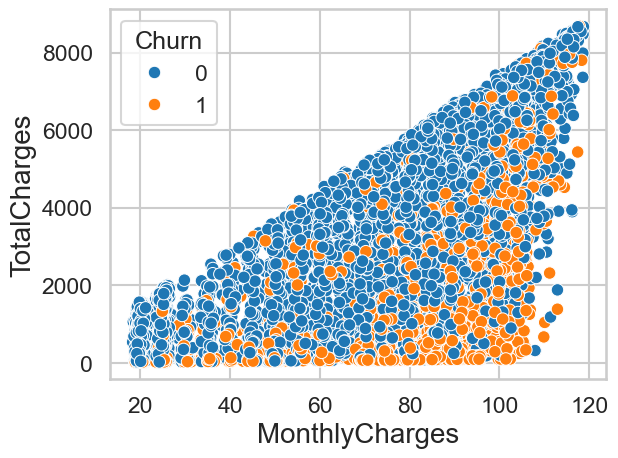

In [75]:
sns.scatterplot(data=telco_data_new, x='MonthlyCharges', y='TotalCharges', hue='Churn')

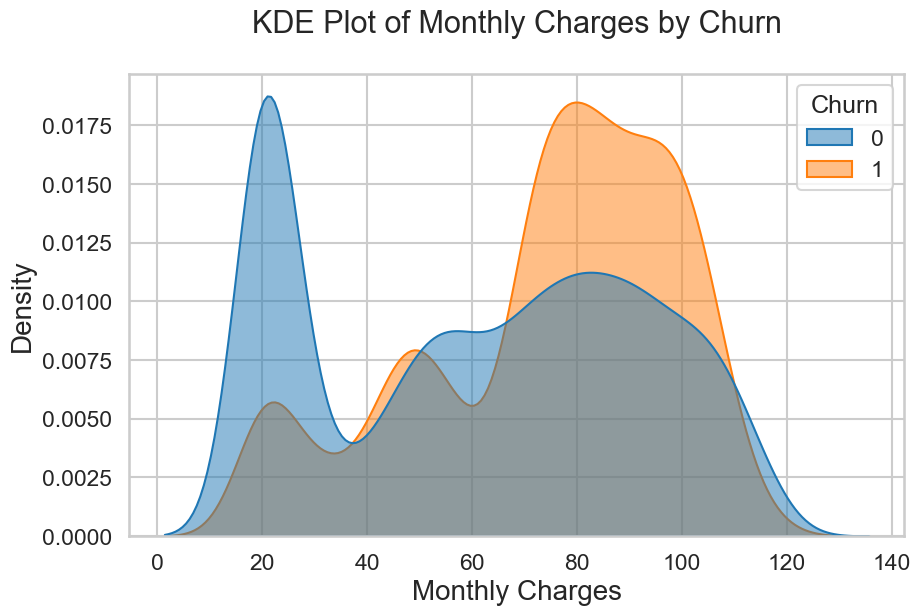

In [76]:
# kde plot for MonthlyCharges by Churn
plt.figure(figsize=(10,6))
sns.kdeplot(data=telco_data_new, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False, alpha=0.5)
plt.title('KDE Plot of Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()


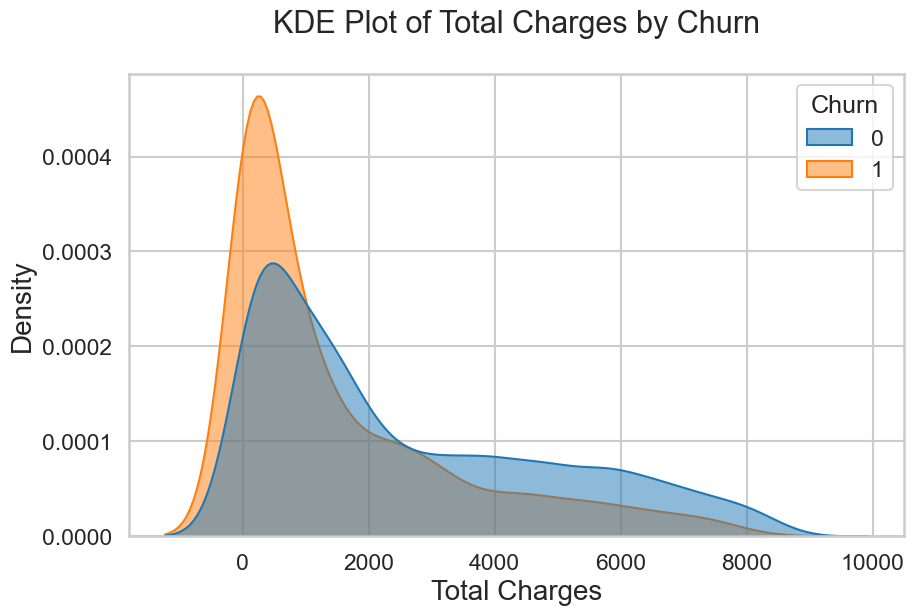

In [77]:
# kde plot for TotalCharges by Churn
plt.figure(figsize=(10,6))
sns.kdeplot(data=telco_data_new, x='TotalCharges', hue='Churn', fill=True, common_norm=False, alpha=0.5)
plt.title('KDE Plot of Total Charges by Churn') 
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.show()

Text(0.5, 1.0, 'Correlation of Features with Churn')

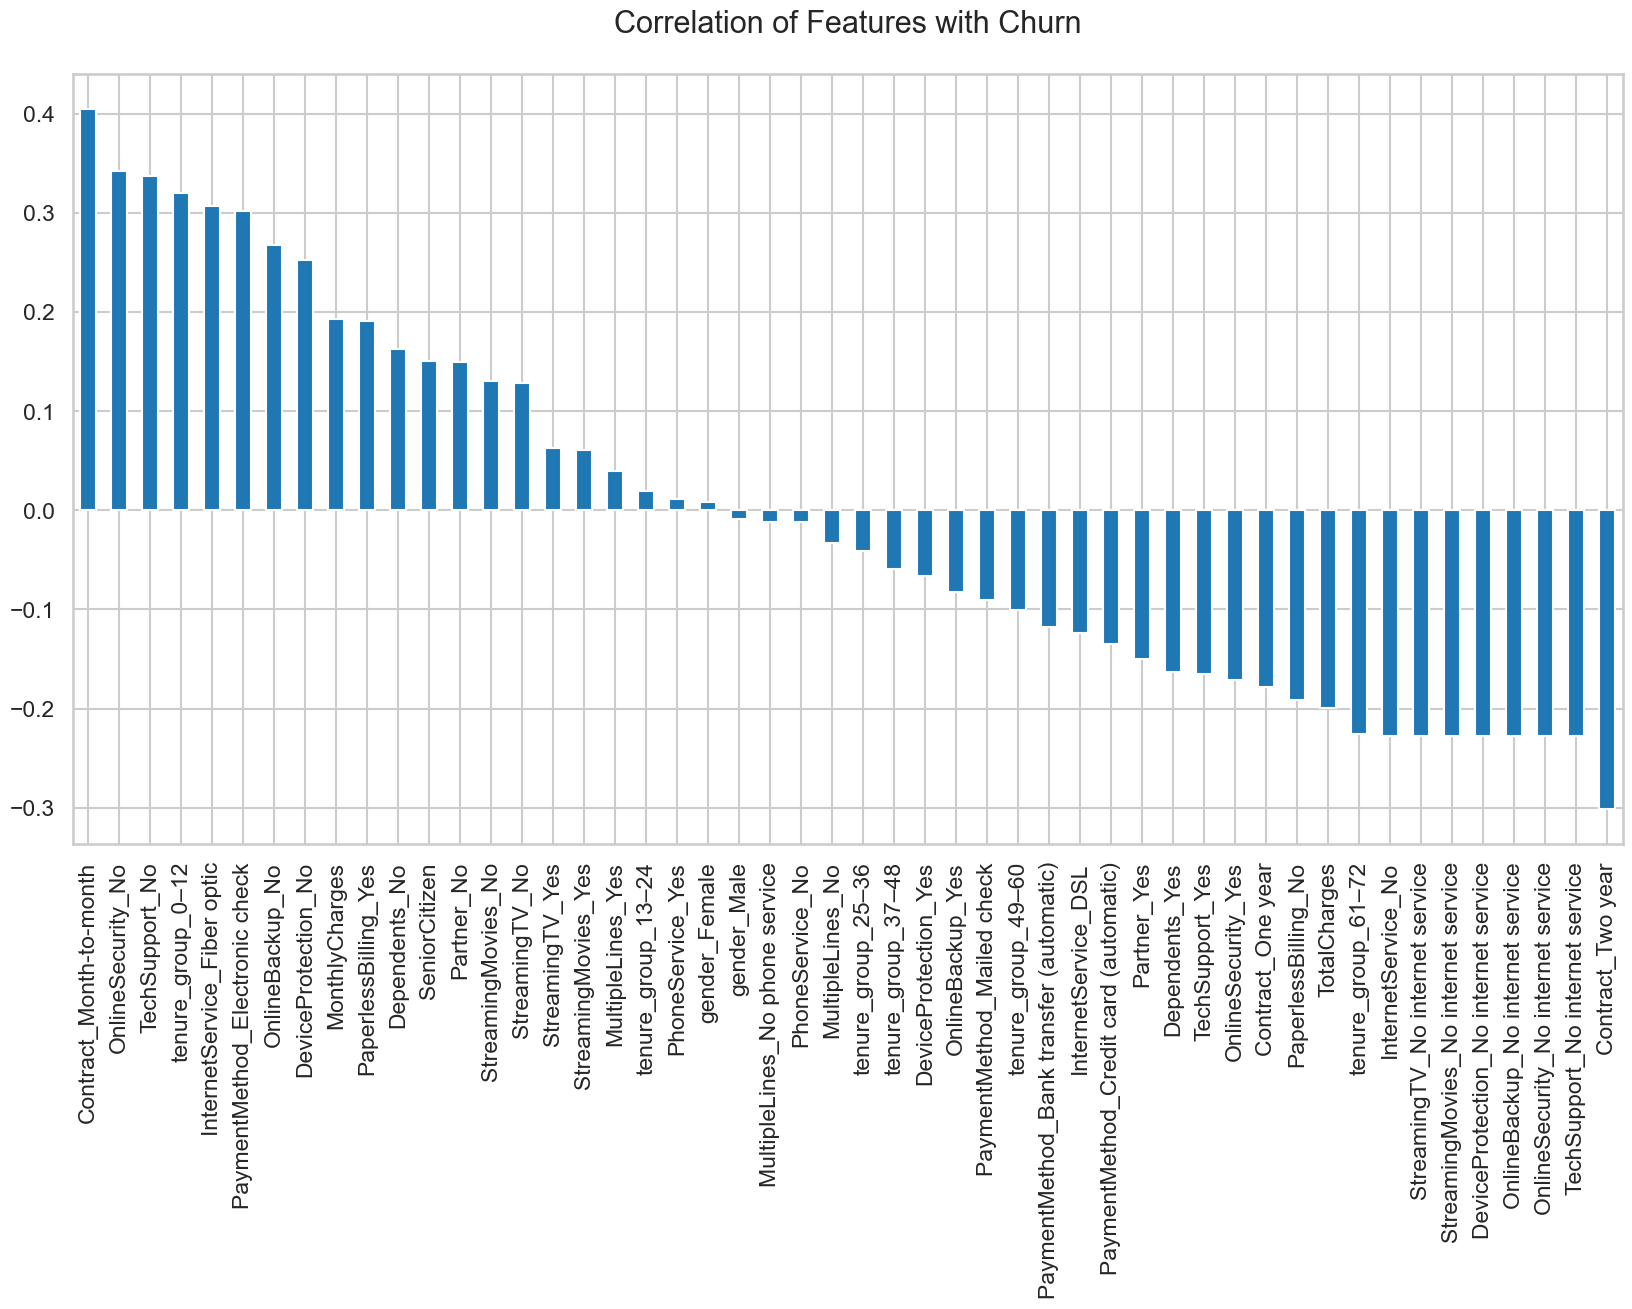

In [78]:
# Correlation of Features with Churn
plt.figure(figsize=(20,10))
telco_data_new.corr()['Churn'].sort_values(ascending=False).drop('Churn').plot.bar()
plt.title('Correlation of Features with Churn')

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

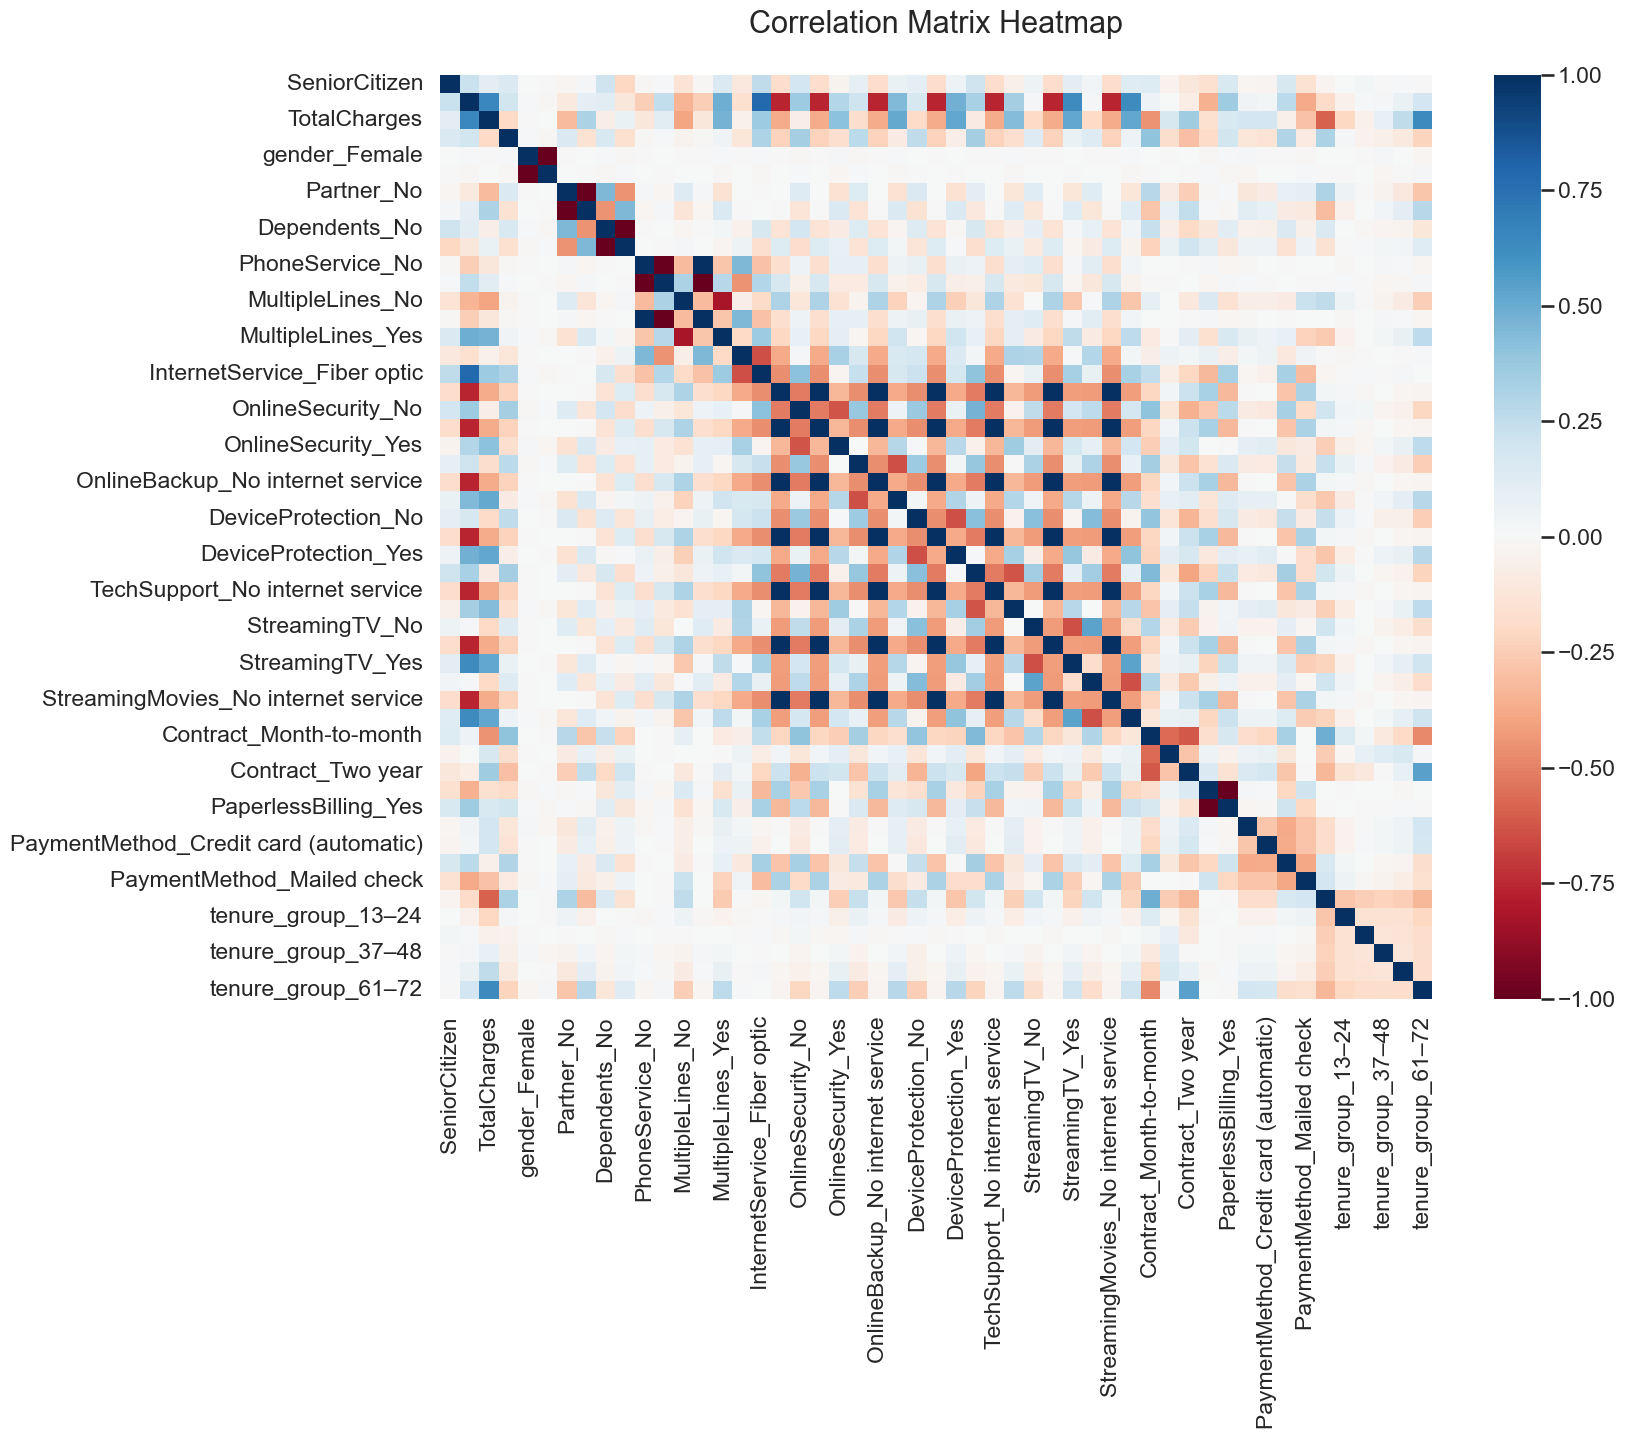

In [79]:
# Correlation Matrix Heatmap
plt.figure(figsize=(16,12)) 
sns.heatmap(telco_data_new.corr(), annot=False, cmap='RdBu')
plt.title('Correlation Matrix Heatmap')

In [83]:
# Bivariate Analysis
telco_target0 = telco_data.loc[telco_data['Churn'] == 0]   # no
telco_target1 = telco_data.loc[telco_data['Churn'] == 1]   # yes

In [109]:
# Function for Univariate Plotting


def uniplot(df, col, title="", hue=None, log_scale=False):
    plt.figure(figsize=(12,6))

    # Main plot
    ax = sns.countplot(
        data=df,
        x=col,
        hue=hue,
        order=df[col].value_counts().index,
        
    )

    plt.title(title, fontsize=18)
    # plt.xticks(rotation=45)

    # Optional log-scale
    # if log_scale:
    #     plt.yscale("log")
    for container in ax.containers:
      ax.bar_label(container)


    plt.tight_layout()
    plt.show()


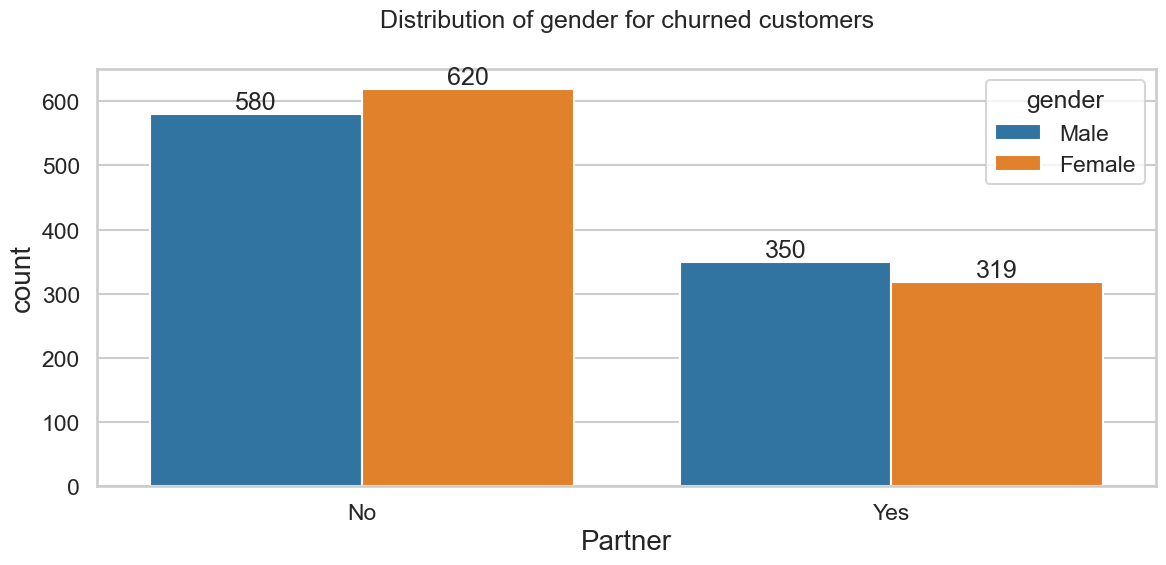

In [110]:
uniplot(telco_target1,col='Partner',title='Distribution of gender for churned customers',hue='gender')

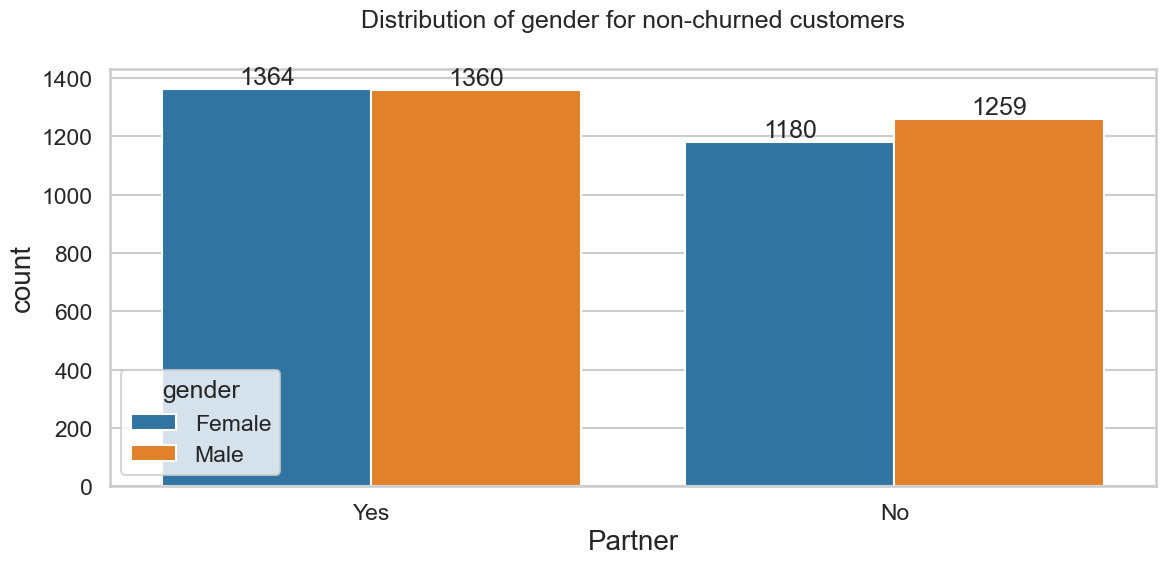

In [111]:
uniplot(telco_target0,col='Partner',title='Distribution of gender for non-churned customers',hue='gender')

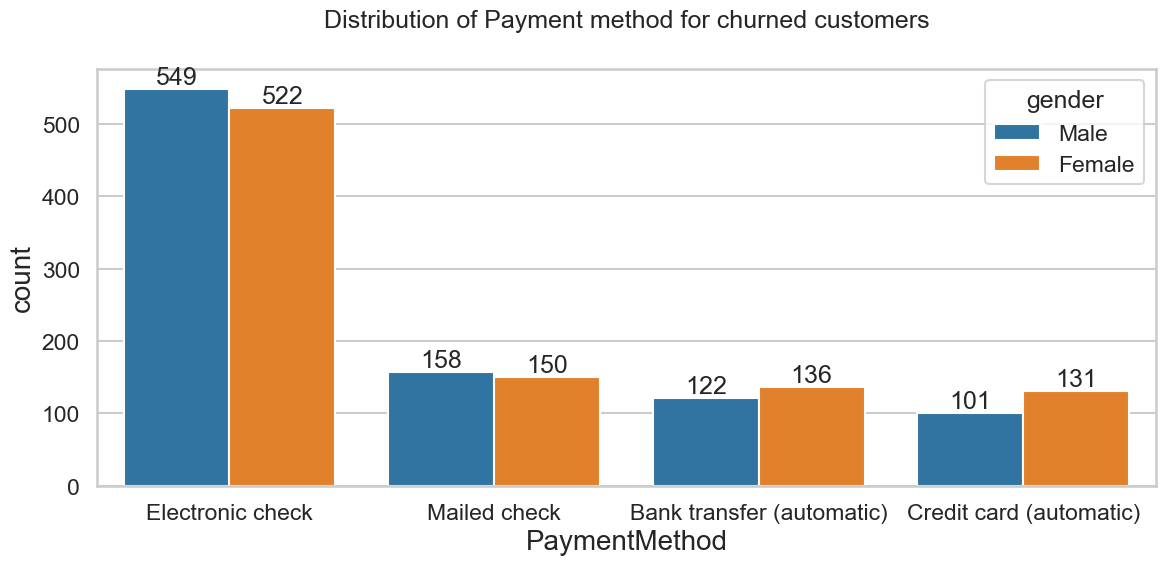

In [112]:
uniplot(telco_target1,col='PaymentMethod',title='Distribution of Payment method for churned customers',hue='gender')

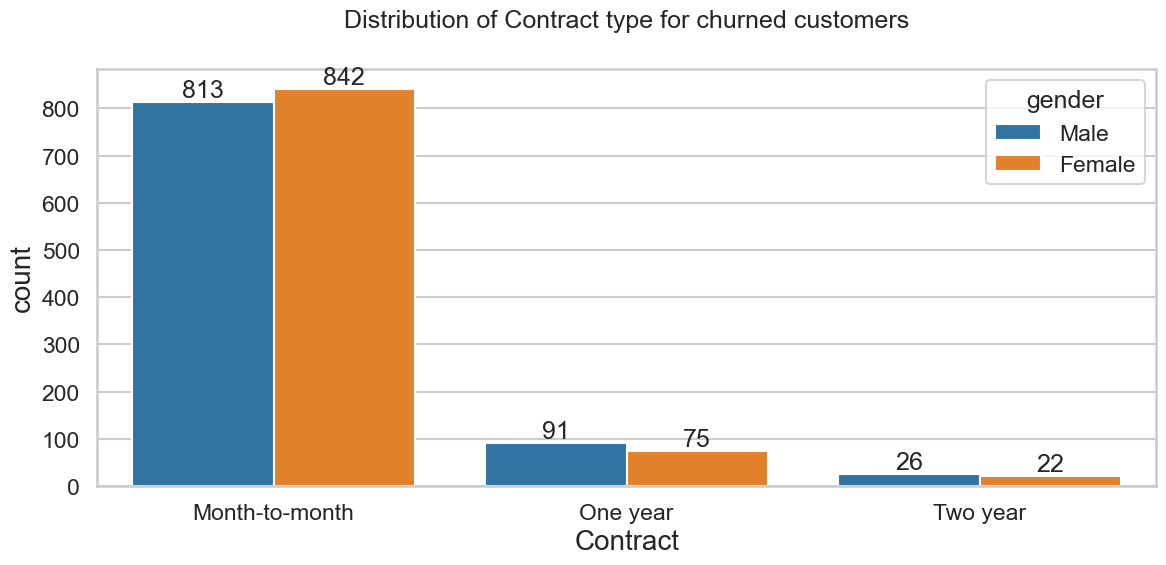

In [113]:
uniplot(telco_target1,col='Contract',title='Distribution of Contract type for churned customers',hue='gender')

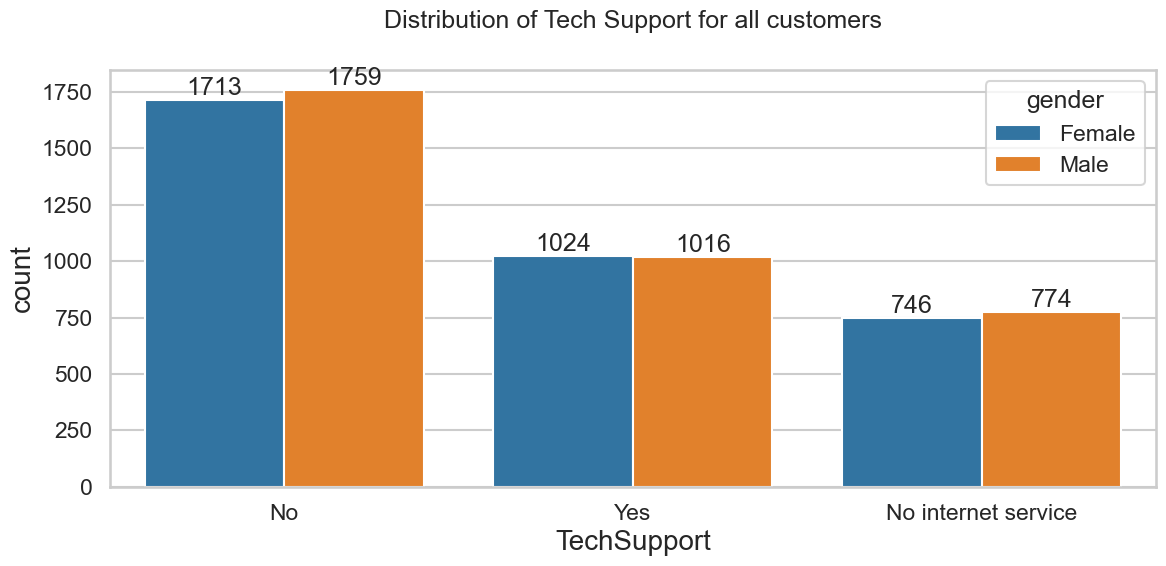

In [114]:
uniplot(telco_data,col='TechSupport', title='Distribution of Tech Support for all customers',hue='gender')

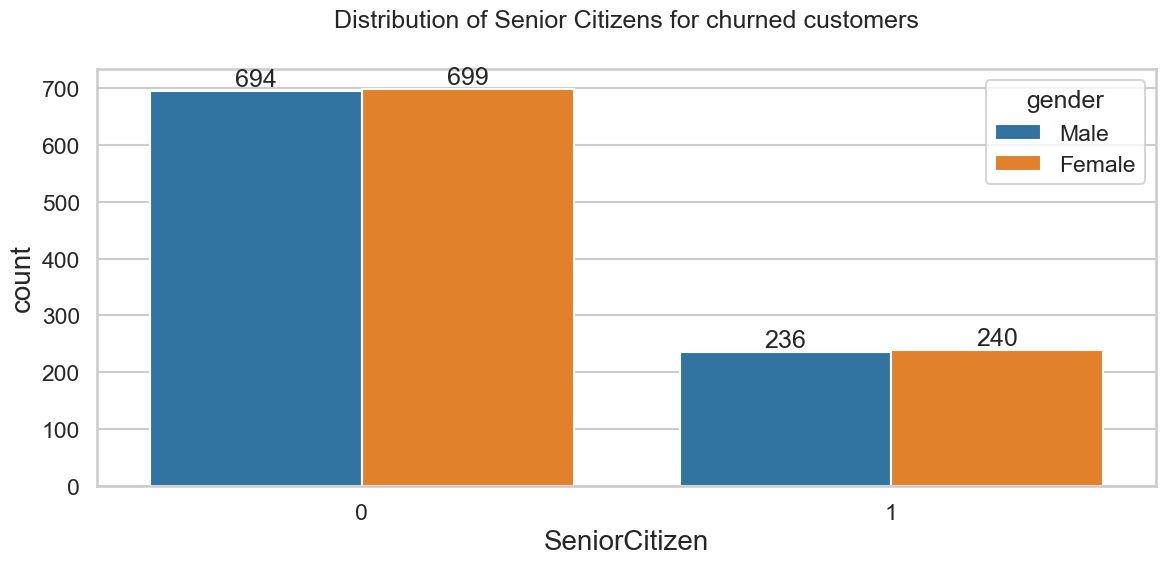

In [115]:
uniplot(telco_target1, col='SeniorCitizen', title='Distribution of Senior Citizens for churned customers', hue='gender')

In [116]:
# Save the cleaned dataset
telco_data_new.to_csv('telco_data_cleaned.csv')